In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import os
from PIL import Image

### Creating class for keeping information about person in population and usefull functions

In [3]:
# Here I create a person with parameters and functions, position in graph will be given as index in the list of people
class Person:
  def __init__(self, infection, position, neighbours, health):
    self.infection = infection # it will be 1 if person is infected with virus and 0 if not
    self.health = health # it will be used to calculate if person healed him/herself from virus
    self.position = position
    self.neighbours = neighbours

  # This function will be used when person will get infected
  def infected(self):
    self.infection = 1
    self.health = 0

  #This fucntion wil be used to watch if person was healed from virus
  def healing(self, healing_rate):
    self.health += healing_rate
    if self.health >=1:
      self.infection = 0
      return 1
    return 0

#This function will be used to calculate cordinates of nodes in cartesian system
def cartesian(position, N):
  x = np.cos(2*np.pi/N*position)
  y = np.sin(2*np.pi/N*position)
  return x, y

#This fucntion is to check if people got infected with virus
def infect(sick_people, people, propability_of_infection):
  n=0
  for i in sick_people:
    neighbours = people[i].neighbours
    for j in neighbours:
      if random.random() <= propability_of_infection:
        Person.infected(people[j])
        n +=1
  return n

#assigning colors to healthy and sick people
def set_color(colors, color_one, color_two):
  for i in range(len(colors)):
    if colors[i] == 1:
      colors[i] = color_one
    else:
      colors[i] = color_two

#creating a plot from positions and colors
def make_graph(positon, connections, colors, day, P_ne):
  #calculating postions od nodes
  x, y = cartesian(positions, N)
  edges = np.zeros([N*N_ne*2, 4])
  edges[:,0], edges[:,1] = cartesian(connections[:,0], N)
  edges[:,2], edges[:,3] = cartesian(connections[:,1], N)

  #creating plot with healthy and ill nodes and edges
  for i in range(len(edges)):
    plt.plot([edges[i,0], edges[i,2]], [edges[i,1], edges[i,3]], color = "black")
  plt.scatter(x, y, s=75, c = colors)
  plt.xticks([])
  plt.yticks([])
  plt.title(f"WS small-world for day {day} with propability of changing neighbour = {1-(1-P_ne)**2}")

#saving graph into folder
def save(folder_path, day):
  file_name = f"{day}.png"
  file_path = os.path.join(folder_path, file_name)
  plt.savefig(file_path)
  plt.close()

def relation(nodes, N_ne):
  N = len(nodes)
  connections = np.zeros([N*N_ne*2, 2])
  for i, person in enumerate(nodes):
    for j in range(N_ne*2):
      connections[i*N_ne*2+j] = [i,person.neighbours[j]]
  return connections

#This function adds and deletes neighbour for the nod that was changing neighbour
def add_and_delete(node, neighbour_to_remove, neighbour_to_add):
  node.neighbours.remove(neighbour_to_remove.position)
  neighbour_to_remove.neighbours.remove(node.position)

  node.neighbours.append(neighbour_to_add.position)
  neighbour_to_add.neighbours.append(node.position)

#This fucntion takes the nod with to much neighbours and to little neighbours
# and makes sure they have N_ne neighbours
def rebalanse(nodes, to_little, to_much, lost_neighbour):
  candidates = to_much.neighbours.copy()
  candidates.remove(lost_neighbour)
  if to_little.position in candidates:
    candidates.remove(to_little.position)
  for value in  to_little.neighbours:
    if value in candidates:
        candidates.remove(value)
  if len(candidates)>1:
    candidates = random.choice(candidates)
  else:
    candidates = candidates[0]
  to_much.neighbours.remove(candidates)
  nodes[candidates].neighbours.remove(to_much.position)
  to_little.neighbours.append(candidates)
  nodes[candidates].neighbours.append(to_little.position)

#this rewires small world
def rewire(nodes, node_index, neighbour_to_remove):
  candidates = [i for i in range(len(people))]
  for i in people[node_index].neighbours:
    candidates.remove(i)
  candidates.remove(node_index)
  candidates = random.choice(candidates)

  add_and_delete(nodes[node_index], nodes[neighbour_to_remove], nodes[candidates])
  rebalanse(nodes, nodes[neighbour_to_remove], nodes[candidates], node_index)

### Setting paramiters for virus

In [4]:
P_inf = 0.2 # This is propability of getting infected when in contact with sick person
healing_rate = 0.25 # Rate at which person is getting better

### Population settings

In [5]:
N= 1000 #size of the population
N_ne = 2 #number of nieghbours from each side a person has
P_ne = [0.01, 0.10, 0.5] #propability of changing neighbour
N_i = 2 # number of infected people
time = 365 # number of iteration for model

### Creating a folder to store created graphics

In [6]:
# Specifing the folder name and path
folder_name = "images"
folder_path = "./" + folder_name  # Using appropriate path

# Create the folder
os.makedirs(folder_path, exist_ok=True)

# Checking if the folder was created
if os.path.exists(folder_path):
    print("Folder created successfully!")
else:
    print("Failed to create folder.")

Folder created successfully!


### Creating a list with average number of infected people

### Runing the simulation

---



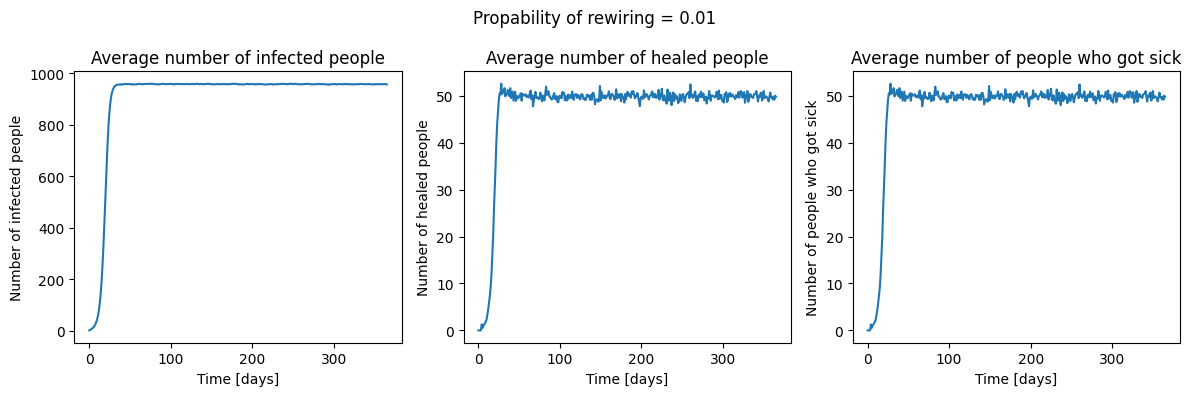

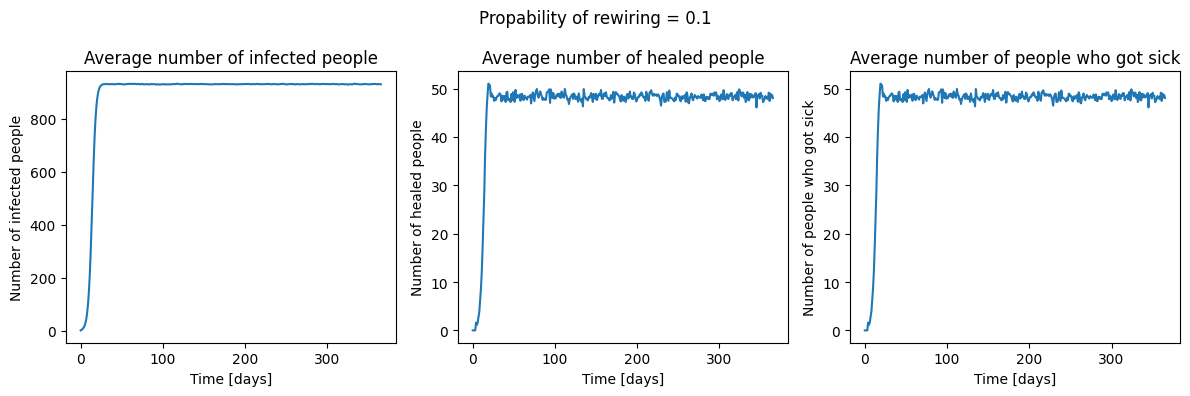

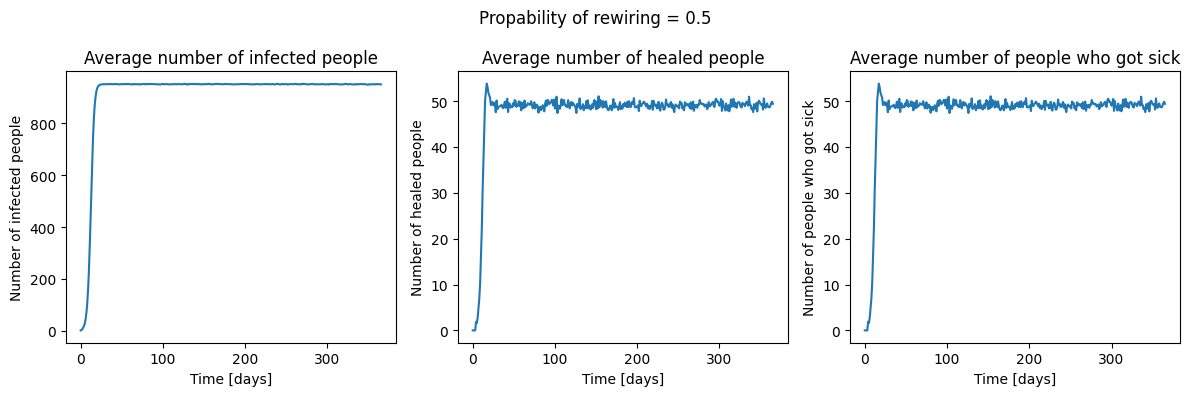

In [10]:
for P in P_ne:
  number_of_infected = np.zeros(time+1) #number of people that are sick during specific day
  healed = np.zeros(time+1) #number of people that got healed during specific day
  infections = np.zeros(time+1) #number of people that got infected during specific day
  repeat_simulation = 100
  for j in range(repeat_simulation):
    people = [] # list with every person in small world
    sick_people = random.sample(range(N), N_i) # indexes of people sick at the beggining of simulation chosen at random
    colors = []
    positions = np.empty(N)
    # Here I create population/nodes and assign values to it for day 0
    for i in range(N):
      position = i
      positions[i] = i
      if any(i == x for x in sick_people):
        infection = 1
        health = 0
      else:
        infection = 0
        health = 1
      neighbours = []
      for j in range(N_ne):
        neighbours.append( (i+j+1)%N )
        neighbours.append( (i-j-1)%N )
      people.append( Person(infection, position, neighbours, health) )
      colors.append(infection)

    number_of_infected[0] += sum(colors)
    '''
    #This block of code is for creating graphics
    connections = relation(people, N_ne)
    set_color(colors, "red", "blue")
    make_graph(positions, connections, colors, 0, P_ne)
    save(folder_path, 0)
    '''

    # Simulating interactions and creating images forthe days > 0
    for t in range(time):
      still_sick = [] # list of sick people
      colors = []
      #this loop crete new edges, collect sick people and heal them
      for position, p in enumerate(people):
        if p.infection == 0:
          for c in range(N_ne*2):
            if random.random() <= P:
              rewire(people, position, people[position].neighbours[c])
        else:
          healed[t+1] += Person.healing(p, healing_rate)
          if p.health < 1:
            still_sick.append(position)
          for c in range(N_ne*2):
            if random.random() <= P:
              rewire(people, position, people[position].neighbours[c])

      #in this loop I cehck if people got infected
      infections[t+1] += infect(still_sick, people, P_inf)
      for p in people:
        colors.append(p.infection)

      number_of_infected[t+1] += sum(colors)
      '''
      #This block of code is for creating graphics
      connections = relation(people, N_ne)
      set_color(colors, "red", "blue")
      make_graph(positions, connections, colors, t+1, P_ne)
      save(folder_path, t+1)
      '''
  number_of_infected = number_of_infected/repeat_simulation
  healed = healed/repeat_simulation
  infections = infections/repeat_simulation

  fig, axes = plt.subplots(1, 3, figsize=(12, 4))
  axes[0].plot(np.arange(0, time+1,1), number_of_infected)
  axes[0].set_title("Average number of infected people")
  axes[0].set_ylabel("Number of infected people")
  axes[0].set_xlabel("Time [days]")
  axes[1].plot(np.arange(0, time+1,1), healed)
  axes[1].set_title("Average number of healed people")
  axes[1].set_ylabel("Number of healed people")
  axes[1].set_xlabel("Time [days]")
  axes[2].plot(np.arange(0, time+1,1), healed)
  axes[2].set_title("Average number of people who got sick")
  axes[2].set_ylabel("Number of people who got sick")
  axes[2].set_xlabel("Time [days]")
  plt.suptitle(f"Propability of rewiring = {P}")
  plt.tight_layout()
  plt.show()
  plt.close()

### Creating a gif from previous plots

In [ ]:
'''
graphs = []

for file_name in os.listdir(folder_path):
    if file_name.endswith(".png"):
        file_path = os.path.join(folder_path, file_name)
        graph = Image.open(file_path)
        graphs.append(graph)

graphs = sorted(graphs, key=lambda img:
                int(''.join(filter(str.isdigit, img.filename))))

# Setting the GIF file path
gif_file_path = "./animated_plot.gif"

# Save the GIF
graphs[0].save(gif_file_path, save_all=True, append_images=graphs[1:], optimize=False, duration=200, loop=0)
'''